In [1]:
import glob
import shutil
from tqdm.notebook import tqdm
import random
import pandas as pd
import numpy as np


# converting to yolo annotation
import xml.etree.ElementTree as ET
import os
import json


In [2]:
def convert_format(data, width, height):
    class_index = data[0]
    if class_index == "0":
        class_index = "2"
    elif class_index == "1":
        class_index = "1"
    elif class_index == "2":
        class_index = "3"
    elif class_index == "3":
        class_index = "4"
    bbox = [float(elem) for elem in data[1:]]
    x, y, w, h = bbox
    xmin = int((x - w / 2) * width)
    ymin = int((y - h / 2) * height)
    xmax = int((x + w / 2) * width)
    ymax = int((y + h / 2) * height)
    return class_index+" "+" ".join([str(xmin), str(ymin), str(xmax), str(ymax)])

In [3]:
image_list = glob.glob('RDD2022_all_countries\\Norway\\test\\images\\*.jpg')


In [4]:
from PIL import Image

subm_file = open("submission2.txt", "w")
for file in tqdm(image_list):

    basename = os.path.basename(file)
    annot_name = basename.split(".")[0]+".txt"
    annot_path = "yolov7\\runs\\detect\\test_detection2\\labels\\"+annot_name
    
    with Image.open(file) as img:
        width, height = img.size
    
    content = []
    if os.path.exists(annot_path):
        with open(annot_path, "r") as f:
            data = [line.strip().split(" ")[:5] for line in f.readlines()]
            for elem in data:
                content.append(convert_format(elem, width, height))
    else:
        content.append("")
        
    subm_file.write(basename+","+" ".join(content)+"\n")
    
subm_file.close()
    

  0%|          | 0/2040 [00:00<?, ?it/s]

In [59]:
f = open("submission.txt", "w")
 

for idx, name in enumerate(tqdm(image_list)):

    f.write(name+","+" ".join(content[idx])+"\n")
        
        
f.close()

  0%|          | 0/862 [00:00<?, ?it/s]

In [4]:
for idx, file in enumerate(tqdm(data['labels'])):

    # parse the content of the xml file
    tree = ET.parse(file)
    root = tree.getroot()
    
    objects = root.findall('object')
    if objects:
        for obj in objects:
            label = obj.find("name").text
            # check for new classes and append to list
            if label not in classes:
                classes.append(label)
                data[label] = np.zeros(len(data['labels']), dtype=int)
            data[label][idx] += 1
    else:
        label = "Empty"
        if label not in classes:
            classes.append(label)
            data[label] = np.zeros(len(annot_list), dtype=int)
        data[label][idx] += 1
        
df = pd.DataFrame(data)
df = df.sample(frac=1).reset_index(drop=True)

df

  0%|          | 0/8161 [00:00<?, ?it/s]

,labels,images,D00,D20,Empty,D40,D10
0,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,6,0,0,0,2
1,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,1,0,0,0,0
2,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0,0
3,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0,0
4,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0,0
...,...,...,...,...,...,...,...
8156,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,2,0,0,0,0
8157,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0,0
8158,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,11,0,0,0,2
8159,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0,0


In [5]:
def plot_data(df):
    frequencies = df.mean(axis=0).sort_values()

    _ = frequencies.plot(title='Dataset for analyzing cracks', 
                         kind='barh', 
                         figsize=(12, 12),
                         color='#479EF8')

,labels,images,D00,D20,Empty,D40,D10
0,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,6,0,0,0,2
1,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,1,0,0,0,0
2,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0,0
3,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0,0
4,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0,0
...,...,...,...,...,...,...,...
8156,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,2,0,0,0,0
8157,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0,0
8158,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,11,0,0,0,2
8159,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0,0


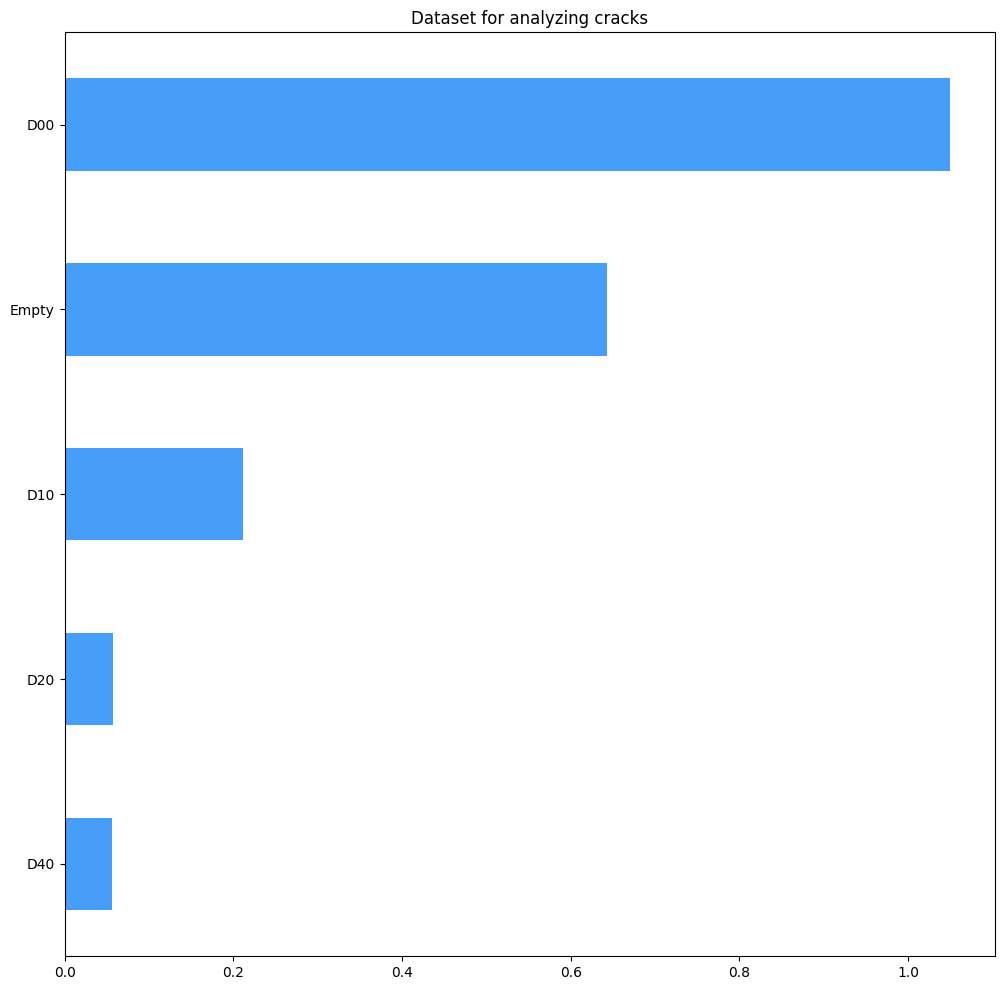

In [6]:
plot_data(df.iloc[:, 2:])

df

In [7]:
trim_df = df.loc[(df['D00'] == df[classes].sum(axis=1)) & (df['D00'] > 0)]

print("Shape of original dataframe:", df.shape)
#Prints shape of dataframe containing all rows where D00 exclusively is 0
print("Trimmer dataframe:", trim_df.shape)
print("Number of D00 cracks detected:", df['D00'].sum())
print("Number of D10 cracks detected:", df['D10'].sum())

Shape of original dataframe: (8161, 7)
Trimmer dataframe: (1580, 7)
Number of D00 cracks detected: 8570
Number of D10 cracks detected: 1730


In [8]:
trim_df = trim_df.sort_values(by=['D00'], ascending=False)
print("Number of D00 detections in trimmer_df:", trim_df['D00'].sum())


trim_df

Number of D00 detections in trimmer_df: 3796


,labels,images,D00,D20,Empty,D40,D10
3033,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,20,0,0,0,0
3328,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,19,0,0,0,0
7655,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,16,0,0,0,0
6294,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,16,0,0,0,0
7540,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,15,0,0,0,0
...,...,...,...,...,...,...,...
3864,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,1,0,0,0,0
3867,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,1,0,0,0,0
3870,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,1,0,0,0,0
3890,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,1,0,0,0,0


In [9]:
cond = df['labels'].isin(trim_df['labels'])
df.drop(df[cond].index, inplace = True)

df.reset_index(drop=True, inplace=True)

print(df.shape)

(6581, 7)


Number of D00 detections after processing: 4774
Number of D10 detections after processing: 1730


C:\Users\hakon\AppData\Local\Temp\ipykernel_4908\293938576.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  frequencies = df.mean(axis=0).sort_values()


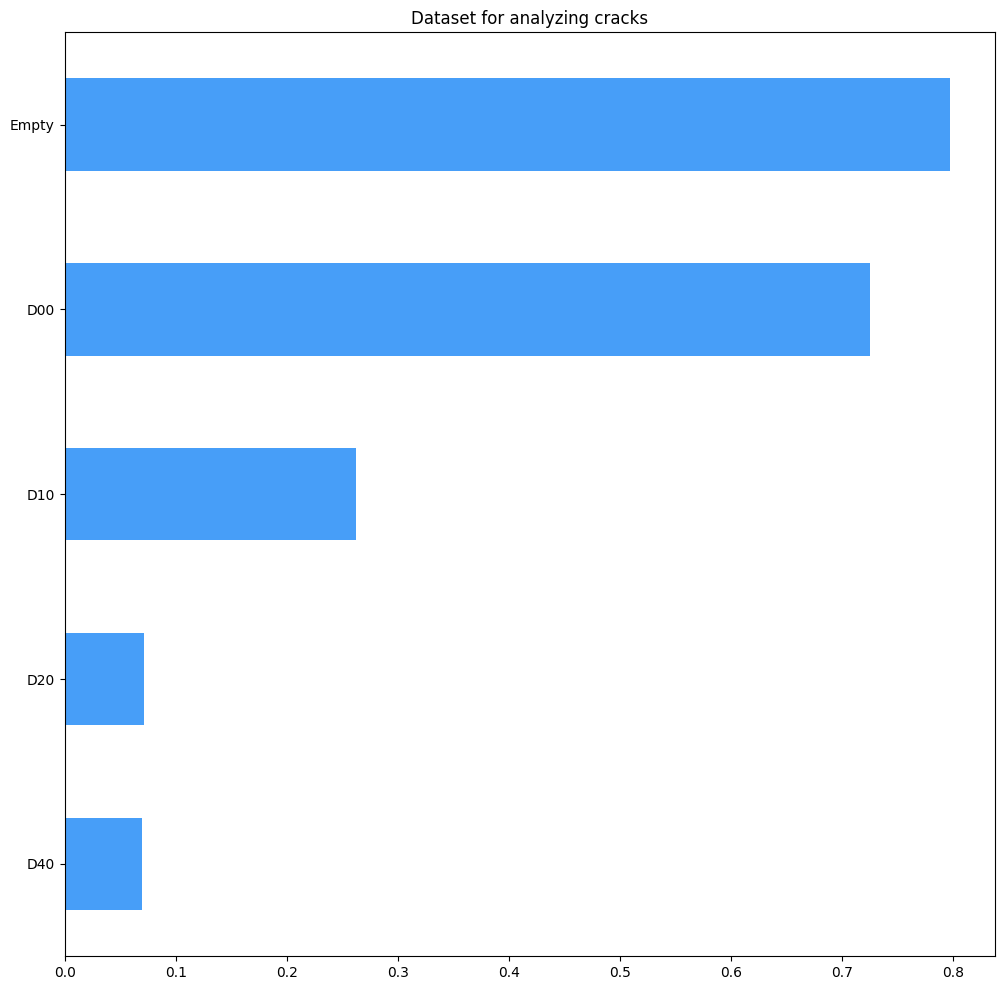

In [10]:
plot_data(df[2:])

print("Number of D00 detections after processing:", df['D00'].sum())
print("Number of D10 detections after processing:", df['D10'].sum())

In [11]:
def get_exclusive_values(df, col_name):
    tmp_df = df.loc[(df[col_name] == df[classes].sum(axis=1)) & (df[col_name] > 0)]
    tmp_df = tmp_df.sort_values(by=[col_name], ascending=False)
    return tmp_df

In [12]:
df

,labels,images,D00,D20,Empty,D40,D10
0,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,6,0,0,0,2
1,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0,0
2,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0,0
3,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0,0
4,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0,0
...,...,...,...,...,...,...,...
6576,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0,0
6577,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0,0
6578,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,11,0,0,0,2
6579,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0,0


In [13]:
tmp_df = df.loc[(df["D00"] != 0)]
tmp_df = tmp_df.sort_values(by=["D00"], ascending=False)
tmp_df.reset_index(drop=True, inplace=True)
tmp_df = tmp_df.iloc[:200, :]

print(tmp_df['D00'].sum())

print("Number of D00 detections after processing:", df['D00'].sum())
print("Number of D10 detections after processing:", df['D10'].sum())
print("Number of D20 detections after processing:", df['D20'].sum())
print("Number of D40 detections after processing:", df['D40'].sum())


tmp_df

2411
Number of D00 detections after processing: 4774
Number of D10 detections after processing: 1730
Number of D20 detections after processing: 468
Number of D40 detections after processing: 461


,labels,images,D00,D20,Empty,D40,D10
0,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,36,0,0,0,8
1,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,29,0,0,0,2
2,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,24,0,0,0,10
3,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,24,1,0,0,4
4,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,24,1,0,0,1
...,...,...,...,...,...,...,...
195,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,8,0,0,0,1
196,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,8,0,0,0,2
197,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,8,1,0,0,2
198,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,8,0,0,1,2


Number of D00 detections after processing: 2363
Number of D10 detections after processing: 1290
Number of D20 detections after processing: 349
Number of D40 detections after processing: 419


C:\Users\hakon\AppData\Local\Temp\ipykernel_4908\293938576.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  frequencies = df.mean(axis=0).sort_values()


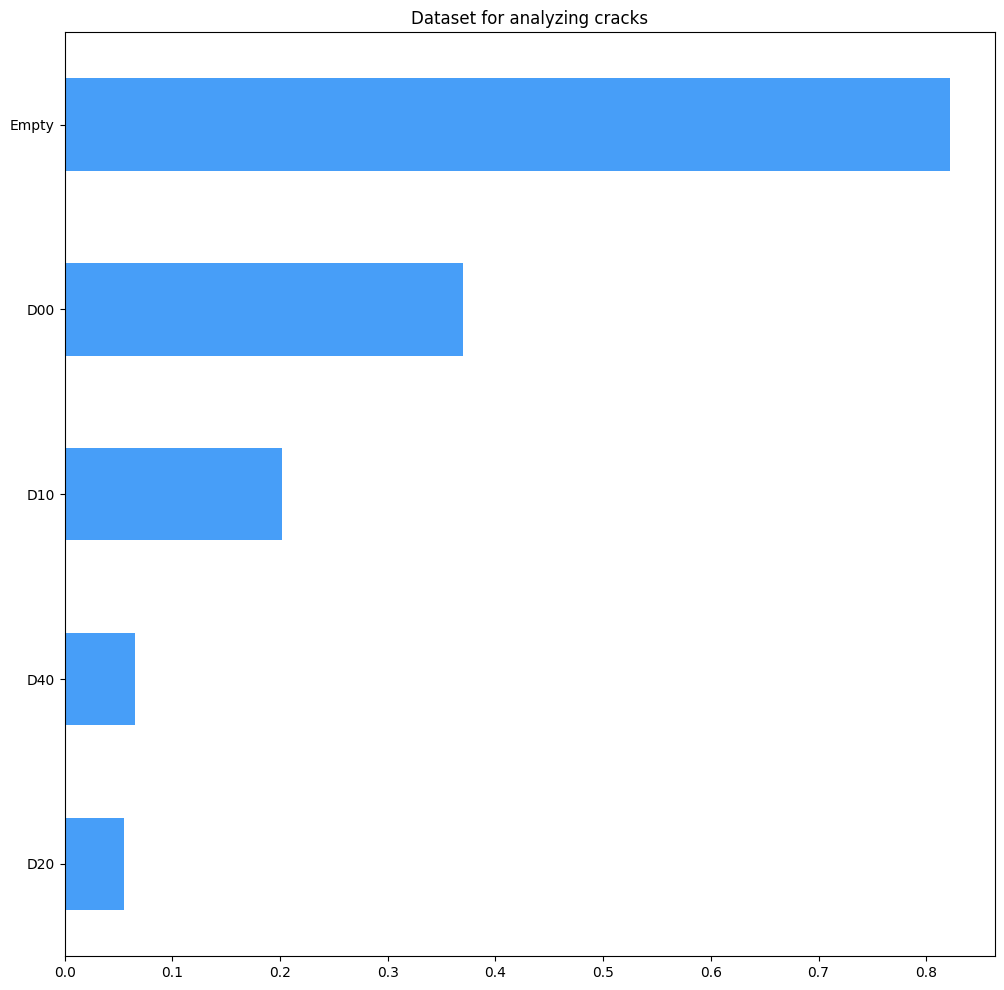

In [14]:
cond = df['labels'].isin(tmp_df['labels'])
df.drop(df[cond].index, inplace = True)

plot_data(df[2:])


print("Number of D00 detections after processing:", df['D00'].sum())
print("Number of D10 detections after processing:", df['D10'].sum())
print("Number of D20 detections after processing:", df['D20'].sum())
print("Number of D40 detections after processing:", df['D40'].sum())

C:\Users\hakon\AppData\Local\Temp\ipykernel_4908\293938576.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  frequencies = df.mean(axis=0).sort_values()


,labels,images,D00,D20,Empty,D40,D10
876,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,2,0,0,0
2610,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,2,0,0,0
4626,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,2,0,0,0
112,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,1,0,0,0
395,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,1,0,0,0
...,...,...,...,...,...,...,...
3989,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,0,5,0
3742,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,0,6,0
1908,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,3,0,7,0
613,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,0,8,0


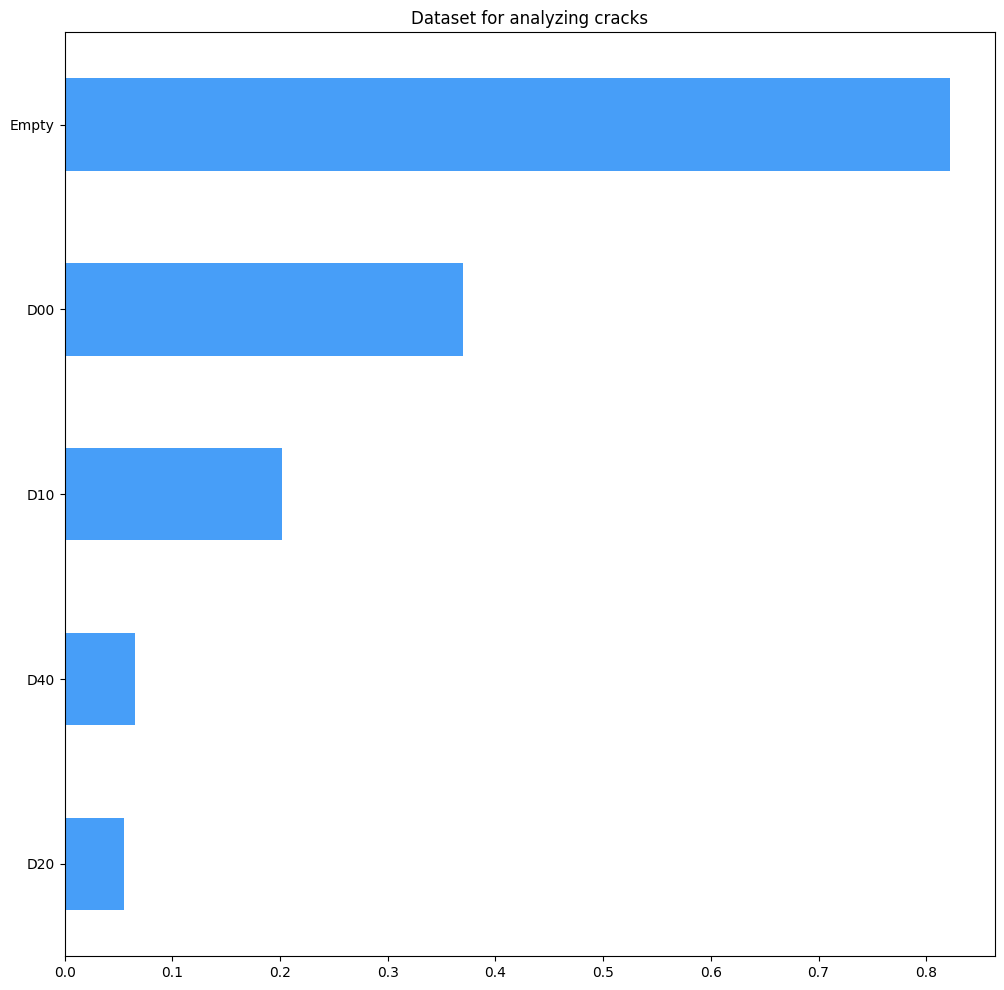

In [15]:
tmp_df = df.loc[(df["D00"] == 0) & (df["Empty"] == 0) & (df["D10"] == 0)]
tmp_df = tmp_df.sort_values(['D40', 'D20'],
              ascending = [True, False,])


plot_data(df[2:])

tmp_df

C:\Users\hakon\AppData\Local\Temp\ipykernel_4908\4103790867.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tmp_df[:90])
C:\Users\hakon\AppData\Local\Temp\ipykernel_4908\4103790867.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tmp_df[:90])
C:\Users\hakon\AppData\Local\Temp\ipykernel_4908\4103790867.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tmp_df[:90])
C:\Users\hakon\AppData\Local\Temp\ipykernel_4908\4103790867.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tmp_df[:90])
C:\Users\hakon\AppData\Local\Temp\ipykernel_4908\293938576.py:2: FutureWarning: The 

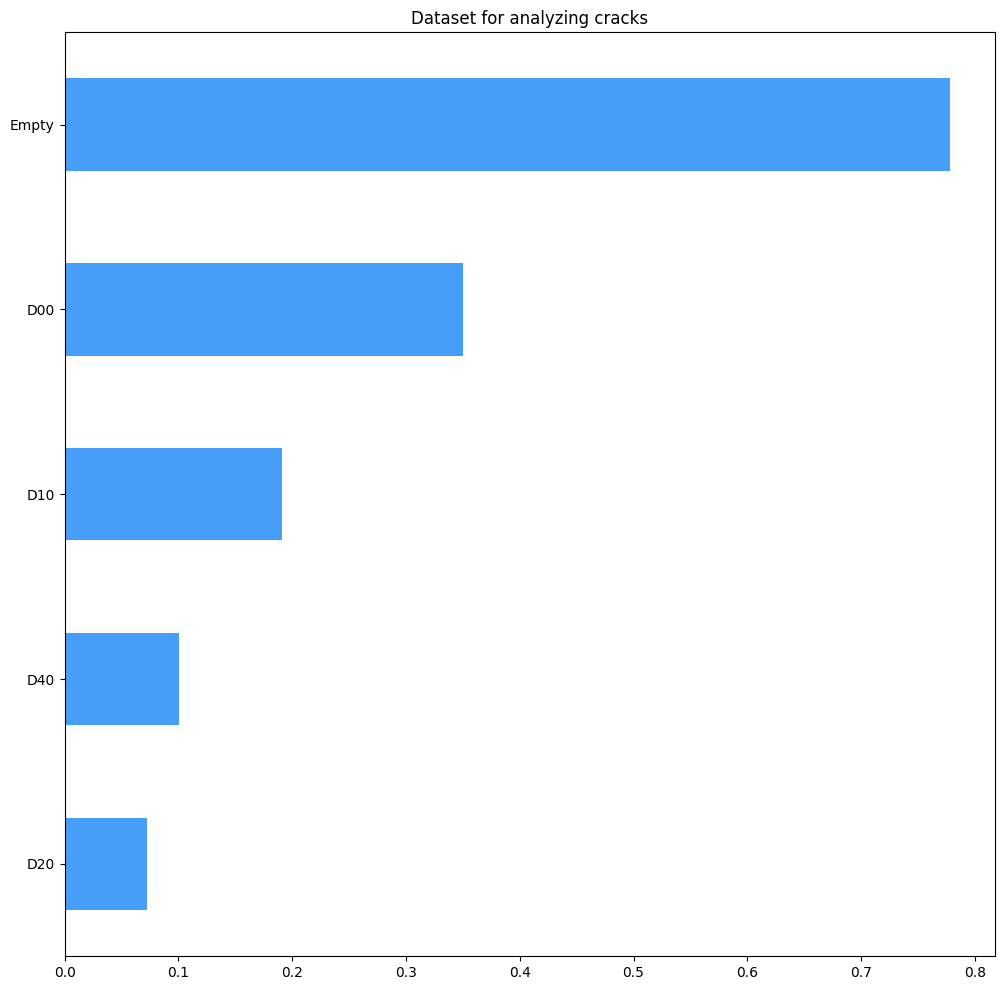

In [16]:
df = df.append(tmp_df[:90])
df = df.append(tmp_df[:90])
df = df.append(tmp_df[:90])
df = df.append(tmp_df[:90])

plot_data(df)

In [17]:
tmp_df = df.loc[df["Empty"] == 1]

tmp_df = tmp_df.iloc[:4700, :]
tmp_df.reset_index(drop=True, inplace=True)
tmp_df

,labels,images,D00,D20,Empty,D40,D10
0,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0,0
1,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0,0
2,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0,0
3,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0,0
4,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0,0
...,...,...,...,...,...,...,...
4695,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0,0
4696,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0,0
4697,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0,0
4698,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0,0


C:\Users\hakon\AppData\Local\Temp\ipykernel_4908\293938576.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  frequencies = df.mean(axis=0).sort_values()


,labels,images,D00,D20,D40,D10
0,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,6,0,0,2
5,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,5,0,0,1
18,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,1,0,1
21,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,0,1
31,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,1,0,0,2
...,...,...,...,...,...,...
5410,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0
6305,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0
6361,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0
1080,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,2,0


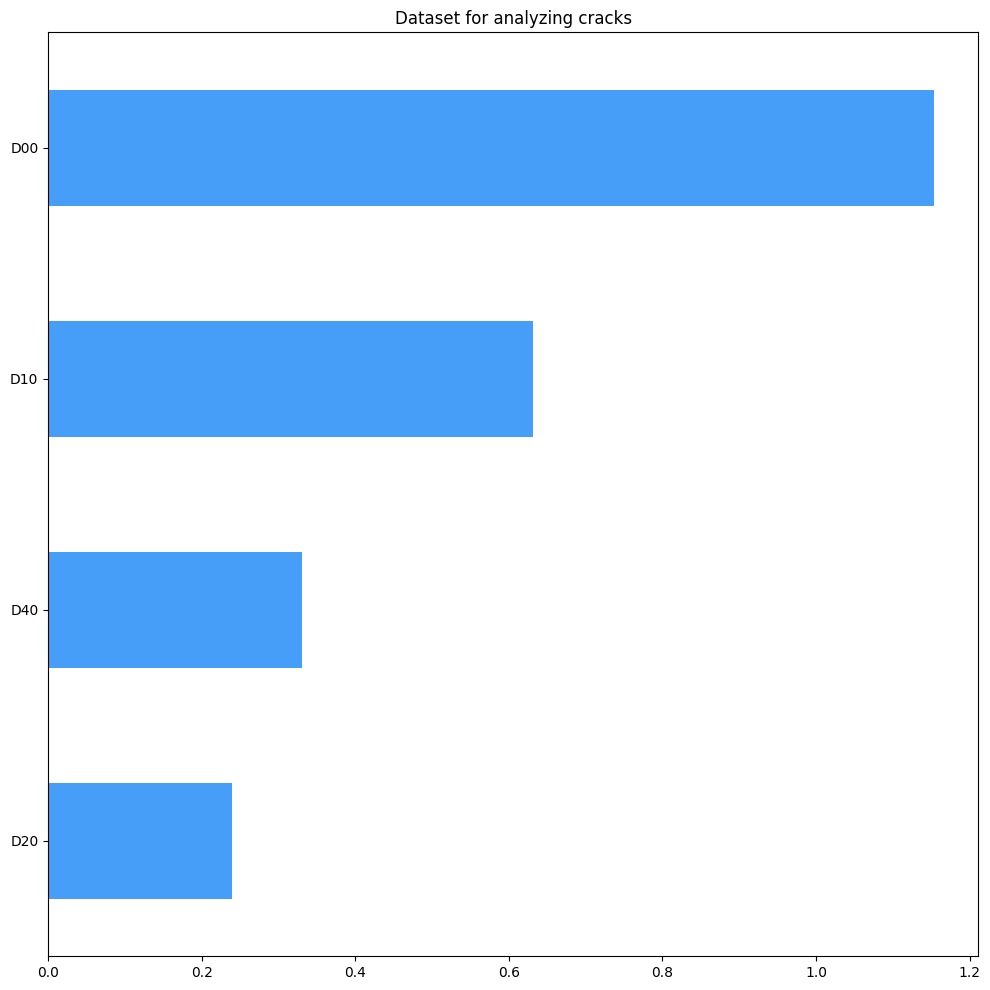

In [18]:
cond = df['labels'].isin(tmp_df['labels'])
df.drop(df[cond].index, inplace = True)

df.drop(columns=["Empty"], inplace=True)
classes.remove("Empty")


plot_data(df[2:])
print(classes)
df

In [19]:
df.reset_index(drop=True, inplace=True)

import numpy as np

split_data = []

for idx, row in tqdm(df.iterrows()):
    if idx <= df.shape[0]*0.75:
        split_data.append('train')
    else:
        split_data.append('val')

        
df['split'] = split_data

0it [00:00, ?it/s]

In [20]:
df.to_csv('training_data.csv')

df

,labels,images,D00,D20,D40,D10,split
0,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,6,0,0,2,train
1,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,5,0,0,1,train
2,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,1,0,1,train
3,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,0,1,train
4,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,1,0,0,2,train
...,...,...,...,...,...,...,...
2036,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0,val
2037,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0,val
2038,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,1,0,val
2039,.\RDD2022_all_countries\Norway\train\annotatio...,.\RDD2022_all_countries\Norway\train\images\No...,0,0,2,0,val


In [21]:
os.makedirs('./dataset/train/images')
os.makedirs('./dataset/train/labels')
os.makedirs('./dataset/val/images')
os.makedirs('./dataset/val/labels')

In [22]:
for idx, row in tqdm(df.iterrows()):
    
    annotation = row['labels']
    image = row['images']
    
    result = []

    # parse the content of the xml file
    tree = ET.parse(annotation)
    root = tree.getroot()
    width = int(root.find("size").find("width").text)
    height = int(root.find("size").find("height").text)
    
    objects = root.findall('object')
    if objects:
        for obj in objects:
            label = obj.find("name").text
            index = classes.index(label)
            pil_bbox = [int(float(x.text)) for x in obj.find("bndbox")]
            yolo_bbox = xml_to_yolo(pil_bbox, width, height)
            # convert data to string
            bbox_string = " ".join([str(x) for x in yolo_bbox])
            result.append(f"{index} {bbox_string}")
    else:
        result.append('')
        

    if result:
        if row['split'] == 'train':
            dest = 'dataset\\train'
        else:
            dest = 'dataset\\val'
        
        
        # generate a YOLO format text file for each xml file
        with open(dest+'\\labels\\'+str(idx).zfill(6)+'.txt', 'w') as f:
            f.write('\n'.join(result))
            
        # moving images
        shutil.copy(
            image,
            dest+'\\images\\'+str(idx).zfill(6)+'.jpg'
        )
        
# generate the classes file as reference
with open('classes.txt', 'w', encoding='utf8') as f:
    f.write(json.dumps(classes))

0it [00:00, ?it/s]

KeyboardInterrupt: 

In [44]:
import cv2
import matplotlib.pyplot as plt

def plot_bounding_box(image_path):
    img = cv2.imread(image_path)
    dh, dw, _ = img.shape

    split_string = image_path.split('\\')
    

    
    label_path = '\\'.join((split_string[:2]))+'\\labels\\'+split_string[3].split('.')[0]+'.txt'
    fl = open(label_path, 'r')
    data = fl.readlines()
    fl.close()

    for dt in data:

        # Split string to float
        _, x, y, w, h = map(float, dt.split(' '))

        # Taken from https://github.com/pjreddie/darknet/blob/810d7f797bdb2f021dbe65d2524c2ff6b8ab5c8b/src/image.c#L283-L291
        # via https://stackoverflow.com/questions/44544471/how-to-get-the-coordinates-of-the-bounding-box-in-yolo-object-detection#comment102178409_44592380
        l = int((x - w / 2) * dw)
        r = int((x + w / 2) * dw)
        t = int((y - h / 2) * dh)
        b = int((y + h / 2) * dh)

        if l < 0:
            l = 0
        if r > dw - 1:
            r = dw - 1
        if t < 0:
            t = 0
        if b > dh - 1:
            b = dh - 1

        cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)

    plt.imshow(img)
    plt.show()



In [ ]:
plot_bounding_box('dataset\\train\\images\\000015.jpg')

In [ ]:
plot_bounding_box('dataset\\train\\images\\000028.jpg')

In [ ]:
plot_bounding_box('dataset\\train\\images\\002008.jpg')